# Statistical foundations for AI

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fifa_22_players.csv', low_memory=False)

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
df.shape

(19239, 110)

In [5]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [7]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [8]:
age = df.loc[:, 'age']

In [9]:
age

0        34
1        32
2        36
3        29
4        30
         ..
19234    22
19235    19
19236    21
19237    19
19238    19
Name: age, Length: 19239, dtype: int64

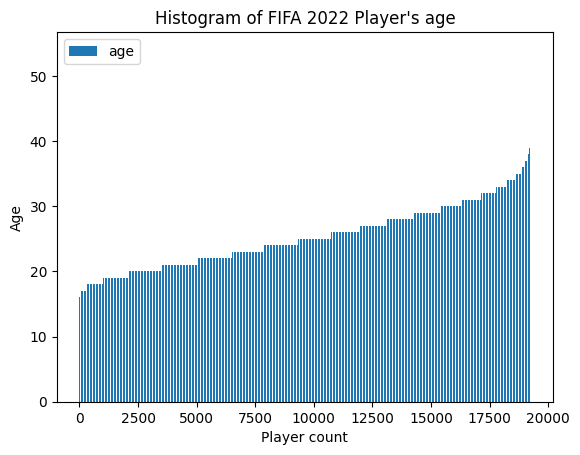

In [9]:
# let's plot the data

import matplotlib.pyplot as plt

plt.title("Histogram of FIFA 2022 Player's age")
plt.xlabel("Player count")
plt.ylabel("Age")
plt.bar(range(len(age)), np.sort(age), label='age')
plt.legend()
plt.show()

## Statistical functions

### Let's look into mean

$$\bar{x}=\frac{\sum{x}}{n}$$

In [11]:
mean_age = sum(age) / len(age)

In [12]:
mean_age

25.210821768283175

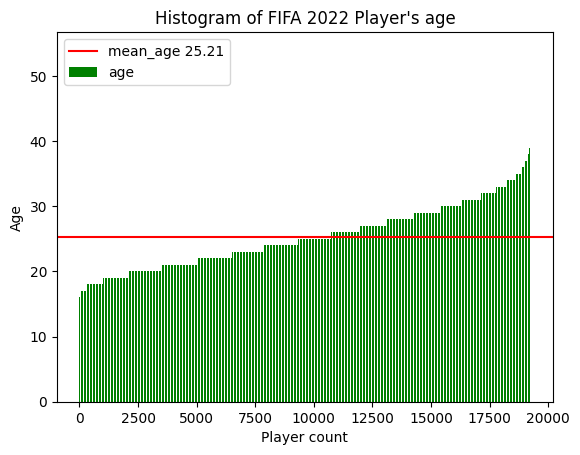

In [13]:
plt.title("Histogram of FIFA 2022 Player's age")
plt.xlabel("Player count")
plt.ylabel("Age")
plt.axhline(mean_age, color='r', label='mean_age ' + str(round(mean_age, 2)))
plt.bar(range(len(age)), np.sort(age), label='age', color='g')
plt.legend()
plt.show()

In [14]:
# let's club the same age together and form counts of the age

from collections import Counter

age_counts = Counter(age)

xs = range(max(age))
ys = [age_counts[x] for x in xs]

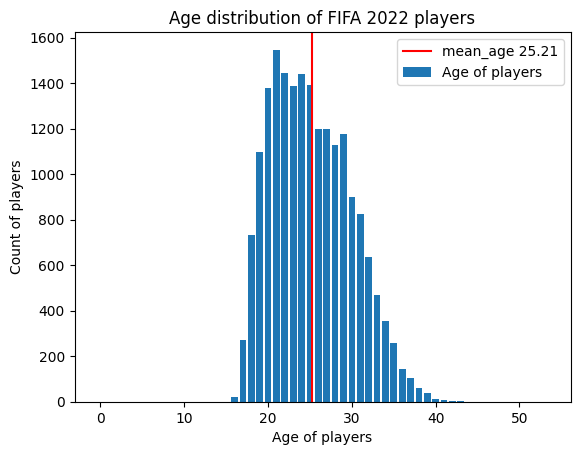

In [15]:
plt. bar(xs, ys, label='Age of players')
# plt.axis([0, max(age), 0, max(age_counts)])
plt.title("Age distribution of FIFA 2022 players")
plt.xlabel("Age of players")
plt.ylabel("Count of players")
plt.axvline(mean_age, color='r', label='mean_age ' + str(round(mean_age, 2)))
plt.legend()
plt.show()

### Median

$$ median(x) = \begin{cases} x_{\dfrac{n+1}{2}},& \text{if n odd} \\ \dfrac{1}{2} \Biggl( x_\dfrac{n}{2} + x_{\dfrac{n+1}{2}} \Biggr) , & \text{otherwise} \end{cases}  $$

In [16]:
def median(data):
    if len(data) %  2 == 0:
        return sorted(data)[(len(data) + 1) // 2]
    else:
        return sorted(data)[len(data) // 2]

In [17]:
median_age = median(age)

In [18]:
new_list = [4, 1, 6, 7, 8, 2, 9, 3, 4]

In [19]:
median(new_list)

4

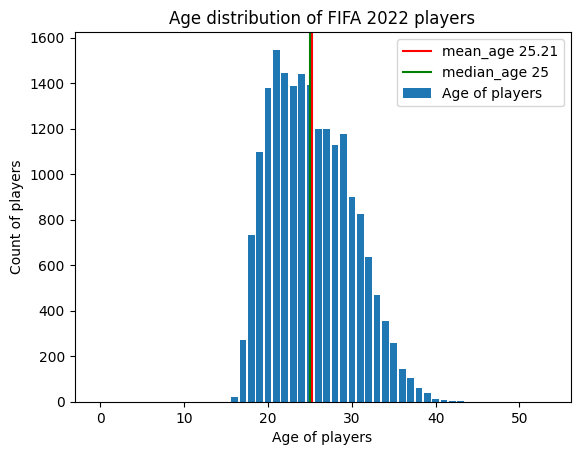

In [20]:
plt. bar(xs, ys, label='Age of players')
# plt.axis([0, max(age), 0, max(age_counts)])
plt.title("Age distribution of FIFA 2022 players")
plt.xlabel("Age of players")
plt.ylabel("Count of players")
plt.axvline(mean_age, color='r', label='mean_age ' + str(round(mean_age, 2)))
plt.axvline(median_age, color='g', label='median_age ' + str(round(median_age, 2)))
plt.legend()
plt.show()

### Dispersion and variance

Dispersion

$$ dispersion = max(List) - min(List) $$

Variance

$$ S^2 = \dfrac{\sum{(x_i - \bar{x})^2}}{n-1}  $$

In [21]:
dispersion = max(age) - min(age)

print(dispersion)

38


In [22]:
def variance(data):
    n = len(data)
    mean = np.mean(data)
    deviations = [x - mean for x in data]
    dev_squares = [x**2 for x in deviations]
    return sum(dev_squares) / (n - 1)

In [23]:
variance(age)

22.545737961734314

### Standard deviation

$$\sigma = \sqrt{\dfrac{\sum{(x_i - \bar{x})^2}}{n-1}} $$

In [24]:
import math
def std(data):
    return math.sqrt(variance(data))
    

In [25]:
std(age)

4.748235247092788

### Correlation

Correlation helps in measuring degree of relationship between two variables.

$$r_{xy}=\frac{\sum_{i=1}^{n}((x_i-\bar{x})(y_i-\bar{y}))}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

In [4]:
# let's see correlation between weight and pace of the players!

weight = df.loc[:, 'weight_kg']
pace = df.loc[:, 'pace']

<AxesSubplot: >

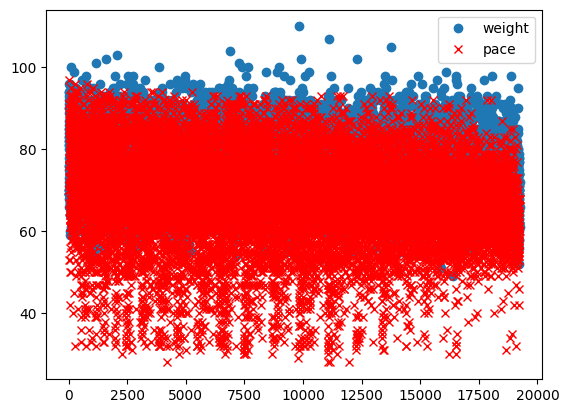

In [5]:
data = {'weight' : weight, 'pace' : pace }
new_df = pd.DataFrame(data)
new_df.plot(style=['o', 'rx'])

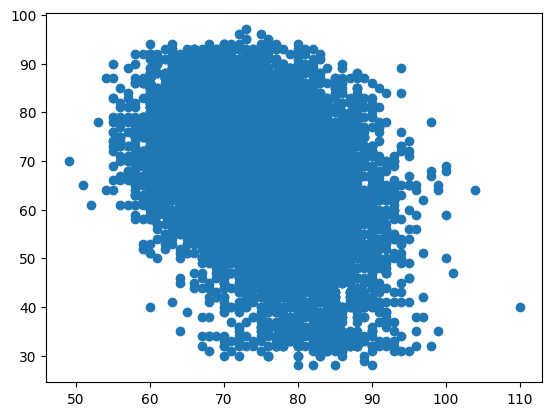

In [10]:
plt.scatter(weight, pace)

In [11]:
corr = df['weight_kg'].corr(df['pace'])

print(corr)

-0.36053658075864764
